In [0]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
# data
data = data = pd.read_csv('UCI_Credit_Card.csv')

(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

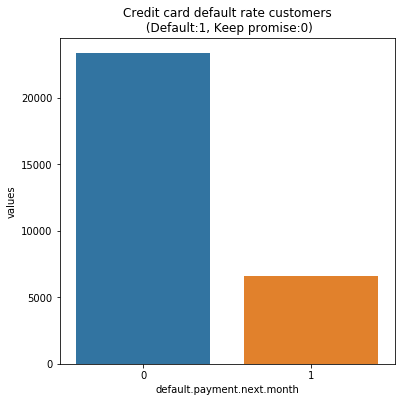

In [0]:
# data info
print(data.shape) # dataset size
print(data.describe()) # describe dataset
# next month info
next_month = data['default.payment.next.month'].value_counts()
print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.figure(figsize = (6,6))
plt.title('Credit card default rate customers\n (Default:1, Keep promise:0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [0]:
# Feature selection, remove the ID field and the last result field

data.drop(['ID'], inplace=True, axis =1) #ID is useless
target = data['default.payment.next.month'].values      #target
columns = data.columns.tolist()                  # All column indexes are placed in a list
columns.remove('default.payment.next.month')       # Delete the target index in the list
features = data[columns].values                      # all features
# 30% as test set，others as the train set
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)

# stratify：Assign according to the proportion of categories in the target field. For example, there are two types of A and B in the targrt before segmentation, and the ratio A:B=2:3, then the ratio of A and B in the training set and the test set after segmentation is still A:B=2:3

# classifiers
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),   
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]

# classifier names
classifier_names = [
            'svc',
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# classifier param
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
  
# GridSearchCV 
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # Find the best parameters and the best accuracy score
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch best params：", search.best_params_)
    print("GridSearch best score： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print(" accuracy %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
  
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


GridSearch best params： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch best score： 0.8186
 accuracy 0.8172
GridSearch best params： {'decisiontreeclassifier__max_depth': 6}
GridSearch best score： 0.8208
 accuracy 0.8113
GridSearch best params： {'randomforestclassifier__n_estimators': 6}
GridSearch best score： 0.8004
 accuracy 0.7994
GridSearch best params： {'kneighborsclassifier__n_neighbors': 8}
GridSearch best score： 0.8040
 accuracy 0.8036


The purpose of this note book is to run base line models on the data set without any significant pre-processing. 

 Exploring the data, using data visualization methods can give us a more intuitive understanding of the data, such as the number of people who want to understand the credit card default rate and non-default rate.

Mulltiple Classifiers were tested against the data-set , GridSearch CV was used to find the best hyperparameters for the models




From the results, we can see that the SVM classifier has the highest accuracy and the test accuracy is 0.8172. In the decision tree classification, I set 3 kinds of maximum depth. When the maximum depth=6, the result is the best, and the test accuracy is 0.8113; in the random forest classification, I set the value of 3 decision trees. When the value is 6, the result is the best, and the test accuracy rate is 0.7994; in the KNN classification, I set three values of n. When the value is 8, the result is the best, and the test accuracy rate is 0.8036.